In [2]:
import pandas as pd

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
csv="movie.csv"
df=pd.read_csv(csv, names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
data.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [7]:
data.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [8]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [9]:
moviemat = data.pivot_table(index ='user_id', columns ='title', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)   #sorting by total number of raters

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [10]:
starwars_user_ratings = moviemat['Star Wars (1977)']


starwars_user_ratings


user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [11]:
AirForceOne_user_ratings = moviemat['Air Force One (1997)']
AirForceOne_user_ratings

user_id
0      NaN
1      NaN
2      4.0
3      2.0
4      5.0
      ... 
939    NaN
940    5.0
941    4.0
942    5.0
943    NaN
Name: Air Force One (1997), Length: 944, dtype: float64

In [12]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_AirForceOne = moviemat.corrwith(AirForceOne_user_ratings)


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [13]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [14]:
corr_AirForceOne = pd.DataFrame(similar_to_AirForceOne, columns =['Correlation'])
corr_AirForceOne.dropna(inplace = True)

corr_AirForceOne = corr_AirForceOne.join(ratings['num of ratings'])
corr_AirForceOne[corr_AirForceOne['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Air Force One (1997),1.000000,431
"Hunt for Red October, The (1990)",0.554383,227
"Firm, The (1993)",0.526743,151
Murder at 1600 (1997),0.514906,218
Eraser (1996),0.500606,206


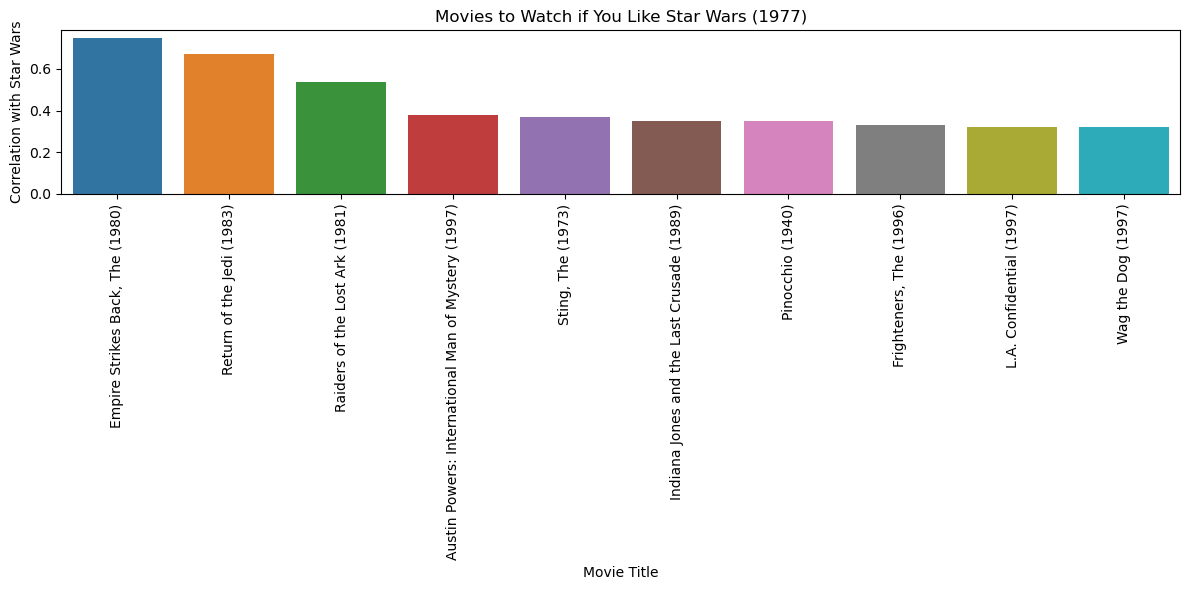

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_recommendations(movie_name, corr_df):
  recommendations = corr_df[corr_df['num of ratings'] > 100].sort_values('Correlation', ascending=False)
  recommendations = recommendations[recommendations.index != movie_name]
  return recommendations.head(10)

starwars_recommendations = get_recommendations('Star Wars (1977)', corr_starwars)

plt.figure(figsize=(12, 6))
sns.barplot(x=starwars_recommendations.index, y=starwars_recommendations['Correlation'])
plt.title('Movies to Watch if You Like Star Wars (1977)')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Correlation with Star Wars')
plt.tight_layout()
plt.show()



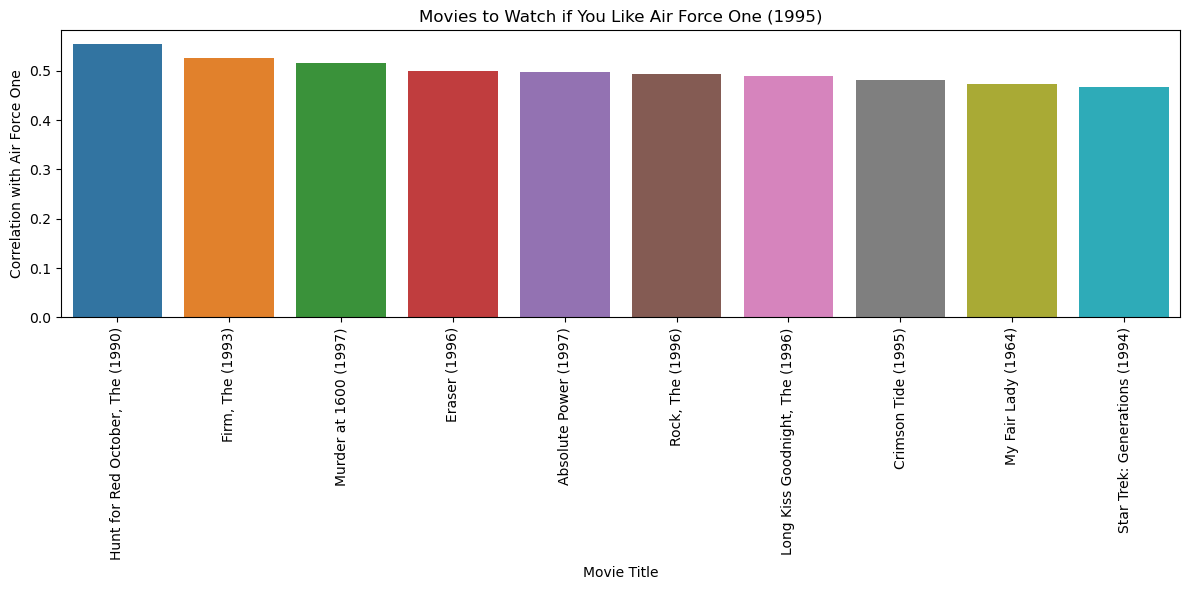

In [16]:
AirForceOne_recommendations = get_recommendations('Air Force One (1997)', corr_AirForceOne)

plt.figure(figsize=(12, 6))
sns.barplot(x=AirForceOne_recommendations.index, y=AirForceOne_recommendations['Correlation'])
plt.title('Movies to Watch if You Like Air Force One (1995)')
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Correlation with Air Force One')
plt.tight_layout()
plt.show()


# 